 Deep Learning Techniques



In [136]:
X = df_rec["review"].values
y = df_rec["recommend"].map({0:1, 1:0}).values

In [137]:
df_rec.review=df_rec.review.apply(lambda x: contractions.fix(x))

In [138]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)


Tokenization 

In [139]:
# from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.text import Tokenizer

num_words = 15001

tokenizer = Tokenizer(num_words=num_words)

In [140]:
tokenizer.fit_on_texts(X_train)

 Word Index 

In [141]:
tokenizer.word_index

{'the': 1,
 'i': 2,
 'and': 3,
 'a': 4,
 'it': 5,
 'is': 6,
 'this': 7,
 'to': 8,
 'in': 9,
 'but': 10,
 'on': 11,
 'for': 12,
 'of': 13,
 'with': 14,
 'was': 15,
 'so': 16,
 'my': 17,
 'dress': 18,
 'not': 19,
 'that': 20,
 'love': 21,
 'size': 22,
 'very': 23,
 'have': 24,
 'top': 25,
 'fit': 26,
 'are': 27,
 'like': 28,
 'be': 29,
 'me': 30,
 'as': 31,
 'wear': 32,
 "it's": 33,
 'great': 34,
 'too': 35,
 "i'm": 36,
 'or': 37,
 'am': 38,
 'just': 39,
 'you': 40,
 'would': 41,
 'they': 42,
 'at': 43,
 'up': 44,
 'fabric': 45,
 'small': 46,
 'color': 47,
 'look': 48,
 'if': 49,
 'really': 50,
 'more': 51,
 'ordered': 52,
 'perfect': 53,
 'little': 54,
 'one': 55,
 'these': 56,
 'will': 57,
 'flattering': 58,
 'well': 59,
 'an': 60,
 'soft': 61,
 'out': 62,
 'back': 63,
 'can': 64,
 'had': 65,
 'because': 66,
 '\r': 67,
 'cute': 68,
 'bought': 69,
 'comfortable': 70,
 'nice': 71,
 'than': 72,
 'beautiful': 73,
 'all': 74,
 'when': 75,
 'looks': 76,
 'fits': 77,
 'large': 78,
 'bit': 79,

In [142]:
len(tokenizer.word_index)

14242

In [143]:
X_train_num_tokens = tokenizer.texts_to_sequences(X_train)
X_test_num_tokens = tokenizer.texts_to_sequences(X_test)


In [144]:
len(X_train_num_tokens)

20376

In [145]:
X_test[:5]

array(["I ordered a regular size s and it was way too boxy for my body type and shorter than the stated length. i don't know if the length stated is from a size m, but the small was definitely shorter (in the front at least).  if you're petite with curves like me, it's not a flattering cut.",
       "Love this t. i now have all the colors. it is so soft and comfortable. great with jeans or dressed up with leggings and boots. and when i feeling lazy i just keep it on and use it as a night shirt to sleep in. it's that comfortable! i found the size to be spot on.",
       "I received this coat as a 30th birthday present from my mother and i have to say, this is the best present she has ever bought me. the inside of the jacket is the softest sheerling i've felt and is pure bliss to wear around town. the coat is actually a lot warmer then i expected, which i'm not going to complain about. the print is lovely and i appreciate the faux leather edge on the cuffs, giving it a more finished look

In [146]:
np.array(X_test_num_tokens[:2], dtype="object")

array([list([2, 52, 4, 183, 22, 199, 3, 5, 15, 116, 35, 285, 12, 17, 172, 475, 3, 318, 72, 1, 1008, 85, 2, 126, 391, 49, 1, 85, 1008, 6, 106, 4, 22, 246, 10, 1, 46, 15, 152, 318, 9, 1, 158, 43, 501, 49, 460, 94, 14, 654, 28, 30, 33, 19, 4, 58, 120]),
       list([21, 7, 301, 2, 286, 24, 74, 1, 92, 5, 6, 16, 61, 3, 70, 34, 14, 91, 37, 307, 44, 14, 270, 3, 321, 3, 75, 2, 805, 2913, 2, 39, 259, 5, 11, 3, 552, 5, 31, 4, 571, 80, 8, 1373, 9, 33, 20, 70, 2, 218, 1, 22, 8, 29, 778, 11])],
      dtype=object)

In [147]:
# X_test.iloc[10]

In [148]:
num_tokens = [len(sen_tokens) for sen_tokens in X_train_num_tokens]
num_tokens = np.array(num_tokens)

In [149]:
num_tokens.max()

116

In [150]:
num_tokens.argmax()

18565

In [152]:
max_tokens = 104

In [153]:
sum(num_tokens <= max_tokens) / len(num_tokens)

0.976148409893993

In [154]:
sum(num_tokens <= max_tokens)

19890

In [155]:
len(num_tokens)

20376

In [156]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
X_train_pad = pad_sequences(X_train_num_tokens, maxlen=max_tokens, padding="pre")
X_test_pad = pad_sequences(X_test_num_tokens, maxlen=max_tokens, padding="pre")


In [157]:
display(X_train_pad.shape)
display(X_test_pad.shape)


(20376, 104)

(2264, 104)

In [158]:
np.array(X_test_num_tokens[28])

array([ 56, 112,  27,  73,  34,  26,   3,  34,  45,  50,  70,   3, 674,
         2,  38, 323, 493,   3,  24,   4,  90, 404,  16,  33,  71,   8,
       219, 112,  20,  27, 179, 537])

In [159]:
len(np.array(X_test_num_tokens[28]))

32

In [160]:
X_test_pad[28]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  56, 112,  27,  73,  34,  26,
         3,  34,  45,  50,  70,   3, 674,   2,  38, 323, 493,   3,  24,
         4,  90, 404,  16,  33,  71,   8, 219, 112,  20,  27, 179, 537],
      dtype=int32)

In [161]:
np.array(X_train_num_tokens[11968])

array([ 3760,    16,     2,    50,    21,     7,    80,    10,     2,
          38,   593,     5,  1053,     9,     8,    26,    30,     2,
        1091,  1081,     3,    38,   264,  1644,   387,     3,    98,
          94,     3,     7,    80,     6,    35,   118,    11,    30,
           3,     2,    93,    60,    99,     2,   125, 11707,   115,
         440,     3,    38,   319,     2,   125,    66,     2,   100,
           5,    41,    29,    35,   113,    36,   173,     8,   259,
           1,    80,    10,     5,     6,    35,   118,    11,    30,
           5,  6331,    62,     9,     1,   158,     3,   153,     9,
           1,    63,    75,    40,  1015,  1763,   965,     3,     2,
         214,     8,    24,     5,  1053,     9,    37,   675,     5,
         367,    31,    58,    31,     5,   346,    29,     1,    83,
           6,   647,     3,     2,    21])

In [162]:
X_train_pad[11968]

array([   38,   593,     5,  1053,     9,     8,    26,    30,     2,
        1091,  1081,     3,    38,   264,  1644,   387,     3,    98,
          94,     3,     7,    80,     6,    35,   118,    11,    30,
           3,     2,    93,    60,    99,     2,   125, 11707,   115,
         440,     3,    38,   319,     2,   125,    66,     2,   100,
           5,    41,    29,    35,   113,    36,   173,     8,   259,
           1,    80,    10,     5,     6,    35,   118,    11,    30,
           5,  6331,    62,     9,     1,   158,     3,   153,     9,
           1,    63,    75,    40,  1015,  1763,   965,     3,     2,
         214,     8,    24,     5,  1053,     9,    37,   675,     5,
         367,    31,    58,    31,     5,   346,    29,     1,    83,
           6,   647,     3,     2,    21], dtype=int32)

Modeling 

In [163]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()

In [164]:
embedding_size = 50

In [165]:
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_tokens))

model.add(Dropout(0.2))

model.add(GRU(units=50, return_sequences=True)) # units equal to word embedding   - best practice
model.add(Dropout(0.2))

model.add(GRU(units=25, return_sequences=True))
model.add(Dropout(0.2))

model.add(GRU(units=12, return_sequences=False))

model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.001)

model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['Recall'])

In [166]:
model.summary()

# embedding_size * num_words ==> 50 * .... = 677300

# 3 x (n2 + nm + 2n) m= input, n= output # GRU

Model: "sequential"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 embedding (Embedding)       (None, 104, 50)           750050    

                                                                 

 dropout (Dropout)           (None, 104, 50)           0         

                                                                 

 gru (GRU)                   (None, 104, 50)           15300     

                                                                 

 dropout_1 (Dropout)         (None, 104, 50)           0         

                                                                 

 gru_1 (GRU)                 (None, 104, 25)           5775      

                                                                 

 dropout_2 (Dropout)         (None, 104, 25)           0         

                                                                 

 gru_2 (GRU)                 (None, 12) 

In [167]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_recall",
                           mode="max",
                           patience = 2,
                           restore_best_weights=True,
                           verbose=1)

In [168]:
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))
class_weights

{0: 0.6106083308360803, 1: 2.760227580601463}

In [169]:
model.fit(X_train_pad,
          y_train,
          epochs=10,
          batch_size=210,
          class_weight=class_weights,   #sample_weight= classes_weights
          validation_data=(X_test_pad, y_test),
          callbacks=[early_stop])

Epoch 1/10

98/98 [==============================] - 25s 175ms/step - loss: 0.5197 - recall: 0.7789 - val_loss: 0.3433 - val_recall: 0.8927

Epoch 2/10

98/98 [==============================] - 16s 161ms/step - loss: 0.3035 - recall: 0.9022 - val_loss: 0.3113 - val_recall: 0.8463

Epoch 3/10

98/98 [==============================] - 16s 161ms/step - loss: 0.2481 - recall: 0.9274 - val_loss: 0.3683 - val_recall: 0.9073

Epoch 4/10

98/98 [==============================] - 16s 161ms/step - loss: 0.2080 - recall: 0.9499 - val_loss: 0.2978 - val_recall: 0.7951

Epoch 5/10

98/98 [==============================] - ETA: 0s - loss: 0.1799 - recall: 0.9585Restoring model weights from the end of the best epoch: 3.

98/98 [==============================] - 16s 160ms/step - loss: 0.1799 - recall: 0.9585 - val_loss: 0.3576 - val_recall: 0.8195

Epoch 5: early stopping


Model Evaluation

In [170]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,0.519670,0.778922,0.343296,0.892683
1,0.303539,0.902194,0.311328,0.846341
2,0.248123,0.927391,0.368291,0.907317
3,0.207995,0.949878,0.297803,0.795122
4,0.179879,0.958548,0.357589,0.819512


<Axes: >

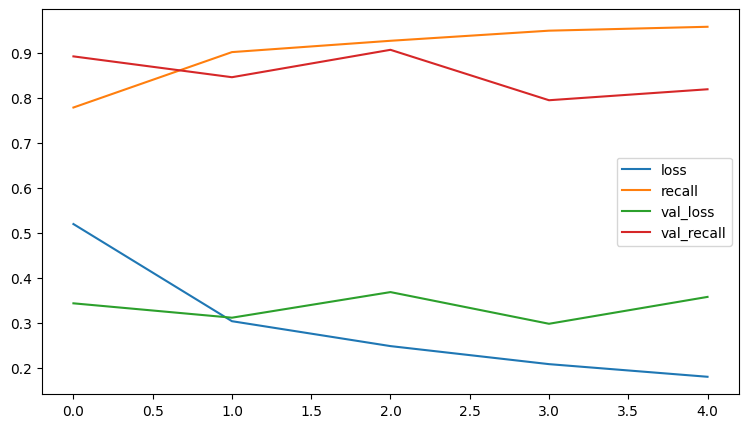

In [171]:
model_loss.plot()

In [172]:
model.evaluate(X_test_pad, y_test)

71/71 [==============================] - 2s 23ms/step - loss: 0.3683 - recall: 0.9073


[0.36829060316085815, 0.9073171019554138]

In [173]:
model.evaluate(X_train_pad, y_train)

637/637 [==============================] - 15s 23ms/step - loss: 0.2687 - recall: 0.9835


[0.2686525583267212, 0.9834733009338379]

In [174]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_pred = model.predict(X_test_pad) >= 0.5

y_train_pred = model.predict(X_train_pad) >= 0.5



print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))
print("-------------------------------------------------------")
print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

71/71 [==============================] - 2s 22ms/step

637/637 [==============================] - 11s 18ms/step

[[1533  321]

 [  38  372]]

-------------------------------------------------------

              precision    recall  f1-score   support



           0       0.98      0.83      0.90      1854

           1       0.54      0.91      0.67       410



    accuracy                           0.84      2264

   macro avg       0.76      0.87      0.78      2264

weighted avg       0.90      0.84      0.86      2264



-------------------------------------------------------

[[14546  2139]

 [   61  3630]]

-------------------------------------------------------

              precision    recall  f1-score   support



           0       1.00      0.87      0.93     16685

           1       0.63      0.98      0.77      3691



    accuracy                           0.89     20376

   macro avg       0.81      0.93      0.85     20376

weighted avg       0.93      0.89      

71/71 [==============================] - 1s 18ms/step


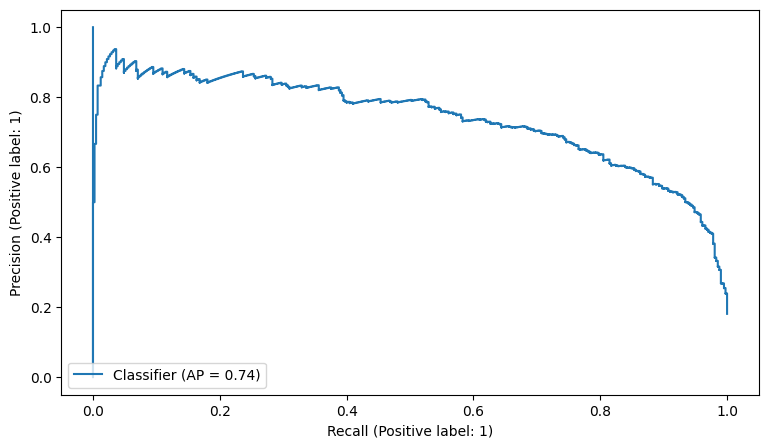

In [175]:
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt

y_pred_proba = model.predict(X_test_pad)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)
plt.show();

In [176]:
from sklearn.metrics import precision_recall_curve, average_precision_score

average_precision_score(y_test, y_pred_proba)

0.739935461075315

In [177]:
DL_AP = average_precision_score(y_test, y_pred_proba)
DL_f1 = f1_score(y_test, y_pred)
DL_rec = recall_score(y_test, y_pred)